In [62]:
from boxoffice.db.frames import get_box_office_day_frame, calculate_movie_frame

bodf = get_box_office_day_frame()

if bodf is None:
    print('No box office data found')
    exit()

filtered = bodf[['movie', 'revenue']]

filtered = filtered.groupby('movie').sum()

filtered = filtered.sort_values(by='revenue', ascending=False)

print(filtered)

top_10_ids = filtered.head(10).index

print(top_10_ids)

         revenue
movie           
1116   992642689
2137   918373000
241    864804872
482    785222649
383    738032821
...          ...
3343          26
2822          26
5897          20
2825          11
4768           4

[6089 rows x 1 columns]
Index([1116, 2137, 241, 482, 383, 1739, 1801, 548, 951, 5], dtype='int64', name='movie')


In [63]:
df = calculate_movie_frame()
df.head()

SELECT "t1"."id", "t1"."truncated_title", "t1"."slug", "t1"."title", "t1"."release_year", "t1"."mpaa_rating", "t1"."running_time", "t1"."synopsis", "t1"."mpaa_rating_reason", "t1"."budget", "t1"."creative_type", "t1"."genre", "t1"."production_method", "t1"."source", SUM("t2"."revenue") AS "total_box_office", MIN("t2"."date") AS "release_day", "t3"."distributor_id" AS "distributor_id", "t4"."franchise_id" AS "franchise_id", "t5"."name" AS "distributor_name", "t5"."slug" AS "distributor_slug", "t6"."name" AS "franchise_name", "t6"."slug" AS "franchise_slug", "t7"."release_day_non_preview", "t7"."largest_theater_count", "t8"."days_over_1000_theaters", "t9"."days_over_1000000_revenue", "t10"."days_over_100000_revenue", "t11"."preview_sum" FROM "movie" AS "t1" INNER JOIN "boxofficeday" AS "t2" ON ("t1"."id" = "t2"."movie_id") INNER JOIN "moviedistributor" AS "t3" ON ("t3"."movie_id" = "t1"."id") LEFT OUTER JOIN "moviefranchise" AS "t4" ON ("t4"."movie_id" = "t1"."id") INNER JOIN "distributo

,id,truncated_title,slug,title,release_year,mpaa_rating,running_time,synopsis,mpaa_rating_reason,budget,...,director_mean_box_office,weighted_crew_median_box_office,weighted_crew_mean_box_office,weighted_cast_median_box_office,weighted_cast_mean_box_office,wikipedia_pre_release_cumulative_views,wikipedia_pre_release_monday_views,wikipedia_pre_release_week_monday,wikipedia_pre_release_three_monday,wikipedia_cumulative_views
0,4257,Torque,Torque,Torque,2004,PG-13,84.0,,"violence, sexuality, language and drug referen...",40000000.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,4256,Along Came Polly,Along-Came-Polly-(2004),Along Came Polly,2004,PG-13,90.0,,"sexual content, language, crude humor and some...",42000000.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,4304,Win a Date with Tad Hamil…,Win-a-Date-with-Tad-Hamilton,Win a Date with Tad Hamilton!,2004,PG-13,96.0,,None,24000000.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,4303,The Butterfly Effect,Butterfly-Effect-The,The Butterfly Effect,2004,R,114.0,College student Evan Treborn is afflicted with...,"violence, sexual content, language and brief d...",13000000.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,4307,The Big Bounce,Big-Bounce-The,The Big Bounce,2004,PG-13,88.0,,"sexual content and nudity, violence and language",50000000.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [6]:
df.columns

Index(['id', 'truncated_title', 'slug', 'title', 'release_year', 'mpaa_rating',
       'running_time', 'synopsis', 'mpaa_rating_reason', 'budget',
       'creative_type', 'genre', 'production_method', 'source',
       'total_box_office', 'release_day', 'distributor_id', 'franchise_id',
       'distributor_name', 'distributor_slug', 'franchise_name',
       'franchise_slug', 'release_day_non_preview', 'largest_theater_count',
       'days_over_1000_theaters', 'days_over_1000000_revenue',
       'days_over_100000_revenue', 'preview_sum', 'release_day_first_friday',
       'release_day_of_week', 'release_day_of_week_non_preview',
       'release_month', 'release_day_of_month', 'opening_wide_revenue',
       'opening_weekend_revenue', 'first_five_days_revenue',
       'first_seven_days_revenue', 'total_revenue_within_365_days',
       'opening_weekend_to_total_ratio', 'preview_to_weekend_ratio',
       'fri_sat_ratio_first_five', 'sat_sun_ratio_first_five',
       'sun_mon_ratio_first_five

In [7]:
df['wikipedia_cumulative_views'].describe()

count    2.459000e+03
mean     1.042221e+06
std      2.787623e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.346285e+05
max      4.044622e+07
Name: wikipedia_cumulative_views, dtype: float64

        id             truncated_title                                slug  \
1594  1116  Star Wars Ep. VII: The Fo…  Star-Wars-Ep-VII-The-Force-Awakens   

                                     title  release_year mpaa_rating  \
1594  Star Wars Ep. VII: The Force Awakens          2015       PG-13   

      running_time                                           synopsis  \
1594         136.0  Rey%2C a scavenger from the planet Jakku%2C an...   

           mpaa_rating_reason       budget  ...  \
1594  sci-fi action violence.  533200000.0  ...   

     weighted_crew_median_box_office weighted_crew_mean_box_office  \
1594                             0.0                           0.0   

     weighted_cast_median_box_office weighted_cast_mean_box_office  \
1594                             0.0                           0.0   

      wikipedia_pre_release_cumulative_views  \
1594                               7308580.0   

     wikipedia_pre_release_monday_views  wikipedia_pre_release_week_m

/var/folders/sl/2bth227n2bz24mmk9w3byqth0000gn/T/ipykernel_31194/1310024723.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Using a colormap for varying the line color based on Wikipedia views


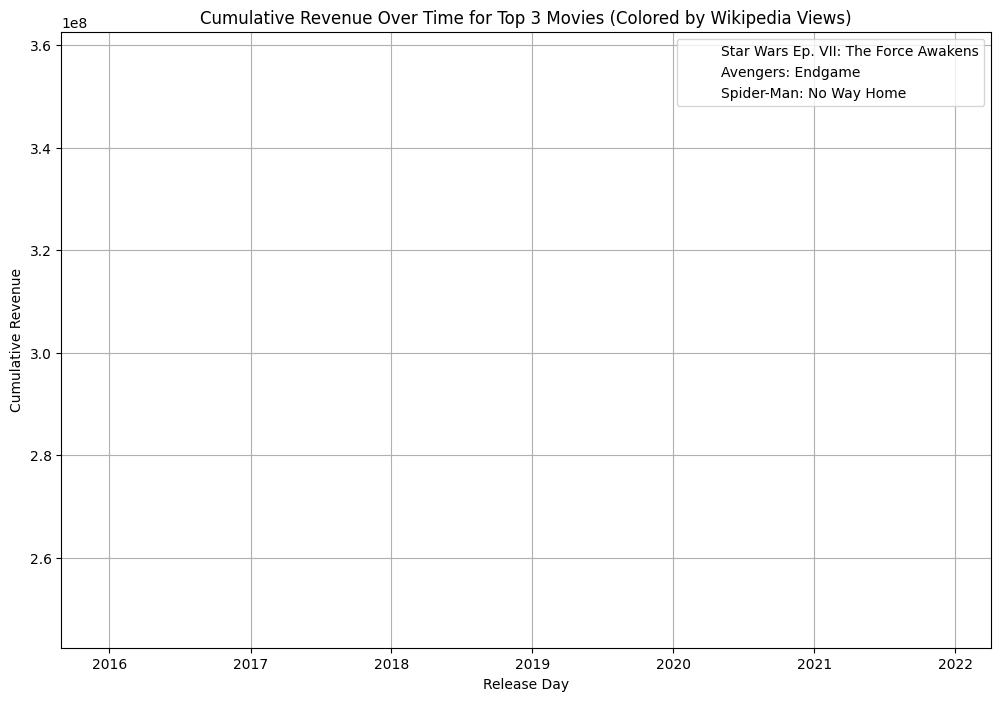

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

top_3_movies = df.sort_values(by='total_box_office', ascending=False).head(3)

# Create the plot
plt.figure(figsize=(12, 8))
cmap = cm.get_cmap('viridis')  # Using a colormap for varying the line color based on Wikipedia views

for _, movie in top_3_movies.iterrows():
    movie_title = movie['title']
    movie_id = movie['id']

    # Filter data for the current movie
    movie_data = df[df['id'] == movie_id].copy()
    movie_data = movie_data.sort_values(by='release_day')

    # Calculate cumulative revenue over time
    movie_data['cumulative_revenue'] = movie_data['opening_wide_revenue'].cumsum()
    
    # Normalize the cumulative Wikipedia views for color intensity
    max_views = movie_data['wikipedia_cumulative_views'].max()
    min_views = movie_data['wikipedia_cumulative_views'].min()
    normalized_views = (movie_data['wikipedia_cumulative_views'] - min_views) / (max_views - min_views)

    print(movie_data.head())
    # Plot the line with color intensity based on normalized Wikipedia views
    plt.plot(
        movie_data['release_day'],
        movie_data['cumulative_revenue'],
        color=cmap(normalized_views.mean()),
        label=movie_title,
        linewidth=2.5
    )

plt.xlabel('Release Day')
plt.ylabel('Cumulative Revenue')
plt.title('Cumulative Revenue Over Time for Top 3 Movies (Colored by Wikipedia Views)')
plt.legend()
plt.grid(True)
plt.show()

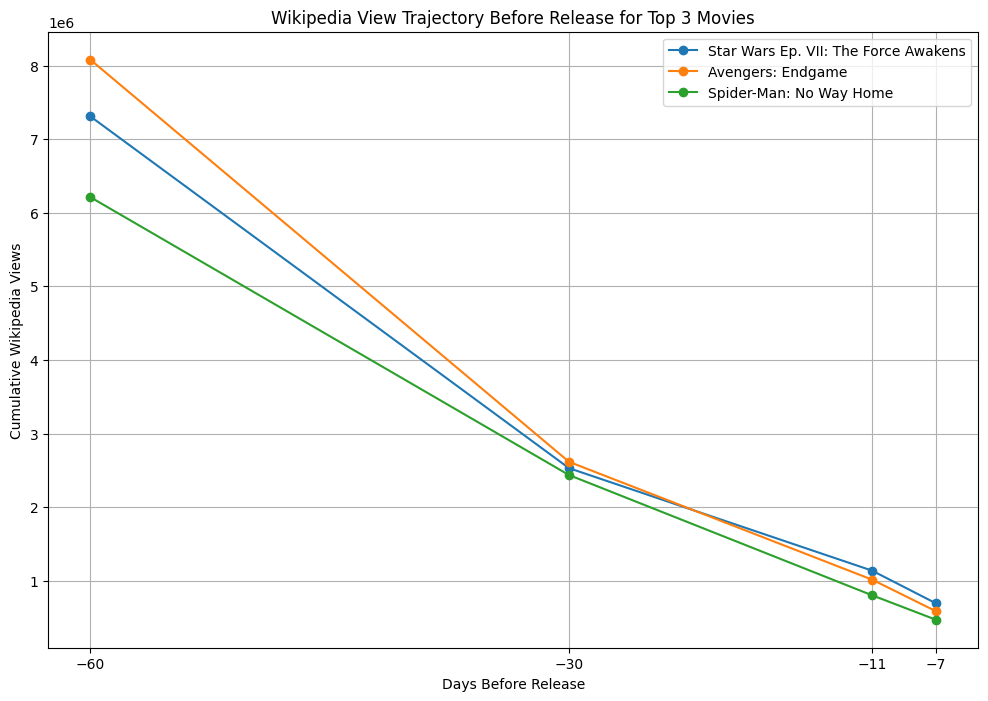

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for _, movie in top_3_movies.iterrows():
    movie_title = movie['title']

    # Extract the pre-release views data
    views_60_days = movie['wikipedia_pre_release_cumulative_views']
    views_30_days = movie['wikipedia_pre_release_monday_views']
    views_11_days = movie['wikipedia_pre_release_week_monday']
    views_7_days = movie['wikipedia_pre_release_three_monday']

    # Define the time points
    time_points = [-60, -30, -11, -7]
    views = [views_60_days, views_30_days, views_11_days, views_7_days]

    # Plotting the line for each movie
    plt.plot(time_points, views, marker='o', linestyle='-', label=movie_title)

plt.xlabel('Days Before Release')
plt.ylabel('Cumulative Wikipedia Views')
plt.title('Wikipedia View Trajectory Before Release for Top 3 Movies')
plt.xticks(time_points)
plt.grid(True)
plt.legend()
plt.show()


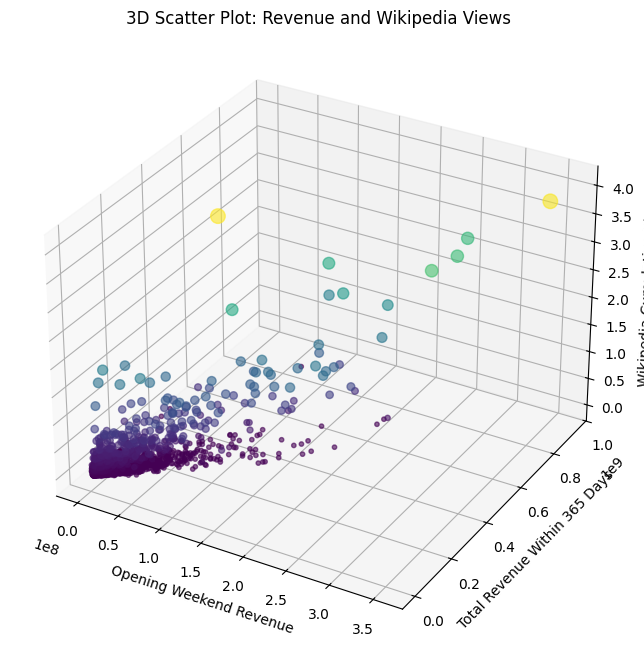

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['opening_weekend_revenue']
y = df['total_revenue_within_365_days']
z = df['wikipedia_cumulative_views']

# Normalize Wikipedia views for marker size
marker_size = (z - z.min()) / (z.max() - z.min()) * 100 + 10

ax.scatter(x, y, z, s=marker_size, alpha=0.6, c=marker_size, cmap='viridis')

ax.set_xlabel('Opening Weekend Revenue')
ax.set_ylabel('Total Revenue Within 365 Days')
ax.set_zlabel('Wikipedia Cumulative Views')
ax.set_title('3D Scatter Plot: Revenue and Wikipedia Views')

plt.show()


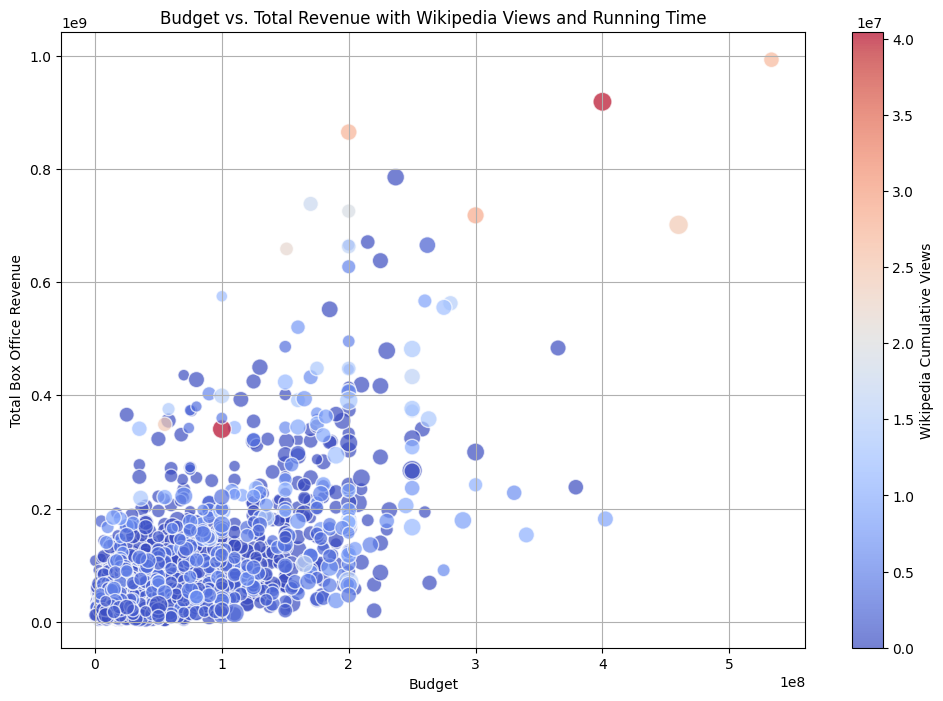

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Normalize running time for marker size
marker_size = (df['running_time'] - df['running_time'].min()) / (df['running_time'].max() - df['running_time'].min()) * 200 + 20

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['budget'], df['total_box_office'],
    s=marker_size,  # Use running time for bubble size
    c=df['wikipedia_cumulative_views'],  # Color based on Wikipedia views
    cmap='coolwarm', alpha=0.7, edgecolors='w'
)

plt.colorbar(scatter, label='Wikipedia Cumulative Views')
plt.xlabel('Budget')
plt.ylabel('Total Box Office Revenue')
plt.title('Budget vs. Total Revenue with Wikipedia Views and Running Time')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

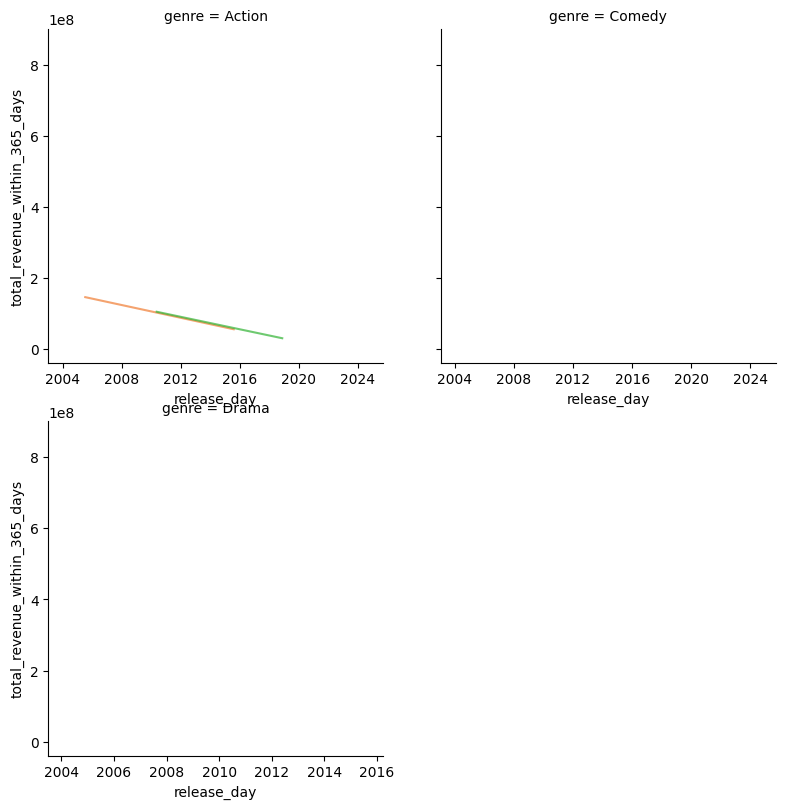

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the DataFrame has been filtered to include only the top 3 movies by genre
# Filter the DataFrame by genres and select the top 3 movies per genre
top_genres = df['genre'].value_counts().index[:3]
filtered_df = df[df['genre'].isin(top_genres)]

# Create a line plot using Seaborn's FacetGrid
g = sns.FacetGrid(filtered_df, col="genre", hue="title", col_wrap=2, height=4, sharex=False, sharey=True)
g.map_dataframe(sns.lineplot, x="release_day", y="total_revenue_within_365_days", alpha=0.7)

# Customize plots
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Release Day", "Total Revenue Within 365 Days")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Revenue Over Time by Genre for Top Movies')

plt.show()


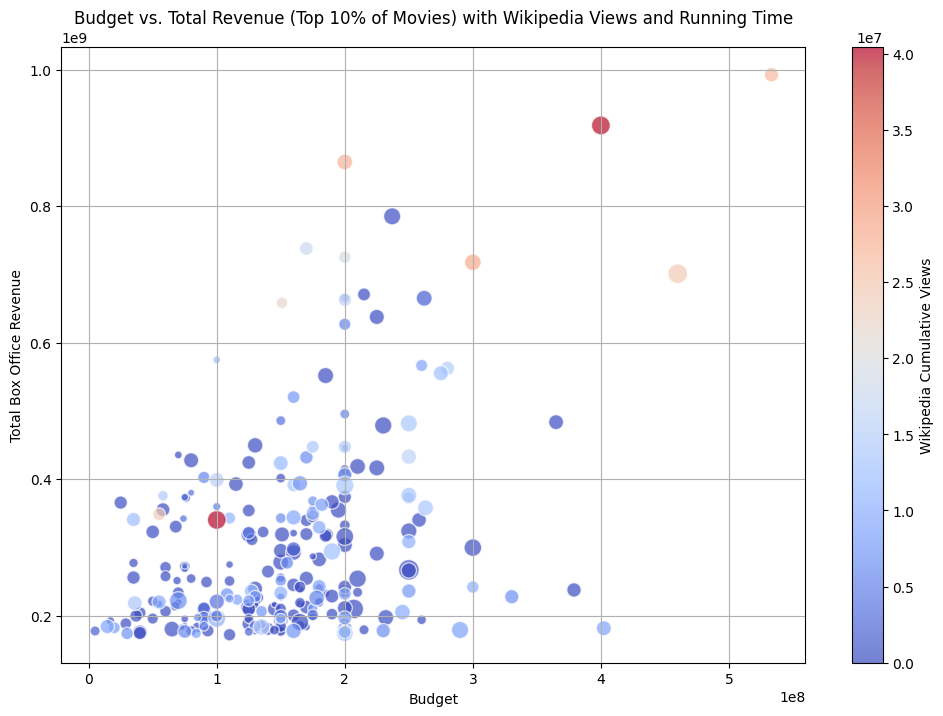

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded with the dataset containing the necessary columns.

# Calculate the top 10% threshold for total box office revenue
top_10_percent_threshold = df['total_box_office'].quantile(0.90)

# Filter the DataFrame to only include the top 10% of movies
top_10_percent_df = df[df['total_box_office'] >= top_10_percent_threshold]

# Normalize running time for marker size
marker_size = (top_10_percent_df['running_time'] - top_10_percent_df['running_time'].min()) / \
              (top_10_percent_df['running_time'].max() - top_10_percent_df['running_time'].min()) * 200 + 20

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    top_10_percent_df['budget'], top_10_percent_df['total_box_office'],
    s=marker_size,  # Use running time for bubble size
    c=top_10_percent_df['wikipedia_cumulative_views'],  # Color based on Wikipedia views
    cmap='coolwarm', alpha=0.7, edgecolors='w'
)

plt.colorbar(scatter, label='Wikipedia Cumulative Views')
plt.xlabel('Budget')
plt.ylabel('Total Box Office Revenue')
plt.title('Budget vs. Total Revenue (Top 10% of Movies) with Wikipedia Views and Running Time')
plt.grid(True)
plt.show()

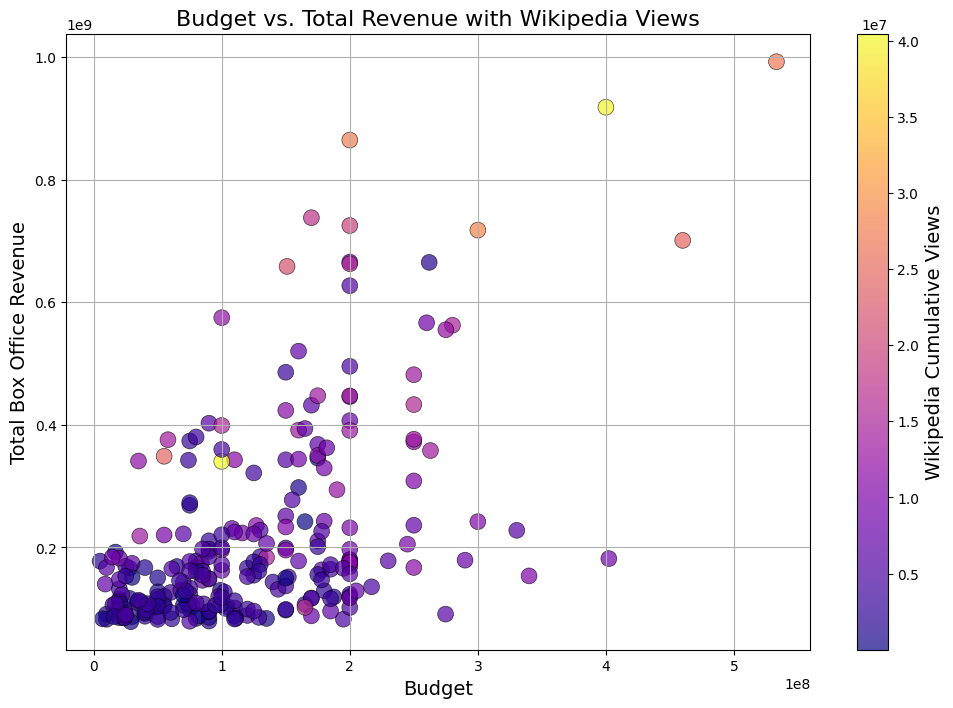

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded with the dataset containing the necessary columns

df = df[df["wikipedia_cumulative_views"] > 0]
# Calculate the top 10% threshold for total box office revenue
top_10_percent_threshold = df['total_box_office'].quantile(0.7)

# Filter the DataFrame to only include the top 10% of movies
top_10_percent_df = df[df['total_box_office'] >= top_10_percent_threshold]

# Calculate the interquartile range (IQR) for Wikipedia views to identify outliers
# q1 = top_10_percent_df['wikipedia_cumulative_views'].quantile(0.25)
# q3 = top_10_percent_df['wikipedia_cumulative_views'].quantile(0.75)
# iqr = q3 - q1

# # Define the lower and upper bounds for non-outlier Wikipedia views
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# Filter out the outliers based on Wikipedia views
filtered_df = top_10_percent_df
#[(top_10_percent_df['wikipedia_cumulative_views'] >= lower_bound) & 
#                                (top_10_percent_df['wikipedia_cumulative_views'] <= upper_bound)]

# Calculate IQR for budget and revenue to find outliers
q1_budget = filtered_df['budget'].quantile(0.25)
q3_budget = filtered_df['budget'].quantile(0.75)
iqr_budget = q3_budget - q1_budget

q1_revenue = filtered_df['total_box_office'].quantile(0.25)
q3_revenue = filtered_df['total_box_office'].quantile(0.75)
iqr_revenue = q3_revenue - q1_revenue

# Define lower and upper bounds for budget and revenue
lower_bound_budget = q1_budget - 1.5 * iqr_budget
upper_bound_budget = q3_budget + 1.5 * iqr_budget

lower_bound_revenue = q1_revenue - 1.5 * iqr_revenue
upper_bound_revenue = q3_revenue + 1.5 * iqr_revenue

# Identify outliers based on budget and revenue
outliers = filtered_df[(filtered_df['budget'] < lower_bound_budget) | (filtered_df['budget'] > upper_bound_budget) |
                       (filtered_df['total_box_office'] < lower_bound_revenue) | (filtered_df['total_box_office'] > upper_bound_revenue)]

# To reduce the number of labels, take only the highest and lowest revenue outliers
selected_outliers = outliers.sort_values(by='total_box_office', ascending=False).head(5)
selected_outliers = pd.concat([selected_outliers, outliers.sort_values(by='total_box_office').head(5)])

# Normalize running time for marker size
marker_size = (filtered_df['running_time'] - filtered_df['running_time'].min()) / \
              (filtered_df['running_time'].max() - filtered_df['running_time'].min()) * 200 + 20

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    filtered_df['budget'], filtered_df['total_box_office'],
    s=130,
    # s=marker_size,  # Use running time for bubble size
    c=filtered_df['wikipedia_cumulative_views'],  # Color based on Wikipedia views
    cmap='plasma', alpha=0.7, edgecolors='black', linewidths=0.5
)

cbar = plt.colorbar(scatter)
cbar.set_label('Wikipedia Cumulative Views', fontsize=14)  # Adjust the font size of the colorbar label

plt.xlabel('Budget', fontsize=14)  # Increased fontsize for x-axis label
plt.ylabel('Total Box Office Revenue', fontsize=14)  # Increased fontsize for y-axis label
plt.title('Budget vs. Total Revenue with Wikipedia Views', fontsize=16)  # Increased fontsize for the title
plt.grid(True)

# Annotate the selected outliers with arrows pointing to the dots and no bold style
for _, row in selected_outliers.iterrows():
    plt.annotate(
        row['title'],  # Movie title
        (row['budget'], row['total_box_office']),
        textcoords="offset points",
        xytext=(20, 20),  # Offset further from the dot
        ha='center',
        fontsize=10,
        arrowprops=dict(arrowstyle="->", lw=1, color='gray')
    )

plt.show()
